/Applications/MuseScore 4.app/Contents/MacOS/mscore
Folder exists.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


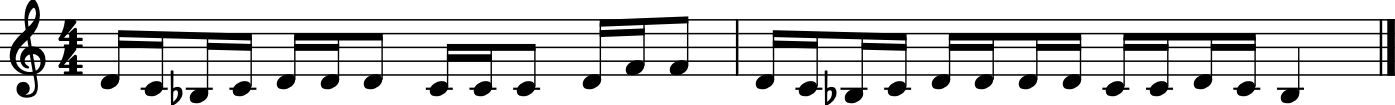

In [1]:
from music21 import *
import os
import subprocess
# %config InlineBackend.figure_format = 'png'
# %config InlineBackend.figure_format = 'svg'

# note that I was debugging for an M1 macbook pro 2022
# MacOS Sonoma 14.2.1
# Python 3.11.5
# music21 9.1.0

# well this works so.....
# subprocess.call(["/usr/bin/open", "-W", "-n", "-a", "/Applications/MuseScore 4.app"])

# one way of changing user settings
# create instance of User Settings
us = environment.UserSettings()
us['musicxmlPath'] = 'C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe'
us['musescoreDirectPNGPath'] = 'C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe'

# the other way of changing user settings
# music21 configuration stuff
musescore_path = "/Applications/MuseScore 4.app/Contents/MacOS/mscore"
environment.set("musescoreDirectPNGPath", musescore_path)
environment.set("musicxmlPath", musescore_path)

# Set the path to the MuseScore executable AND MAKE SURE IT EXISTS! 
#     ~ make sure the space is there between Musescore and 4
#          ~ Note: some sources say to use "/mscore" or some say to use plain "/MuseScore"
#          ~ (probably depends on your version of MuseScore, or may depend on OS)
# musescore_path = "/Applications/MuseScore 4.app" 
# nope, the above doesn't work...

# a-ha!!! FOR MAC: include the following path:
musescore_path = "/Applications/MuseScore 4.app/Contents/MacOS/mscore"
print(musescore_path)
# make sure it exists
if os.path.exists(musescore_path):
    print("Folder exists.")
else:
    print("Folder does not exist.")

# Set the environment variable
# environment.set("musescorePath", musescore_path)
us['musescoreDirectPNGPath'] = musescore_path
environment.set("musescoreDirectPNGPath", musescore_path)
environment.set("musicxmlPath", musescore_path)

s=converter.parse("mary.mid")

# MAKE SURE TO TRY BOTH OF THESE
s.show('musicxml.xml')
s.show('musicxml.png')

# but cannot do it in jupyter notebook because of permissions????? 
#        ~ then you are probably trying to access the wrong folder!
#        ~ make sure to include full path, not just ending in .app (see above)

# FURTHER DEBUGGING:
from music21.converter.subConverters import ConverterMusicXML
conv_musicxml = ConverterMusicXML()
filepath = "score_test.xml"
out_filepath = conv_musicxml.write(s, 'musicxml', fp=filepath, subformats=['png'])
s.show()